# LSE Machine Learning: Practical Applications

## Module 4 Unit 1 IDE Activity (Assessment) | Execute variable selection in R

### In this IDE notebook, you are required to complete some of the steps to apply different variable selection methods to select the most significant variables to include in the model.
The instructions for this IDE activity are positioned as text cells before each step. You are required to read the text cells above a code cell, familiarise yourself with the required step, and execute the step. You are encouraged to refer back to the practice IDE activity to familiarise yourself with the different steps and how they are executed in R.

### Step 1: Load and install the relevant packages

In [1]:
library(ISLR)
library(leaps)
library(dplyr)
library(tidyverse)
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




### Step 2: Load and prepare the data

In [2]:
# Load the data
house <- read.csv("BostonHousing.csv")

# Review summary of the data set
str(house)

# Display the head of the data set
head(house)

'data.frame':	506 obs. of  13 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


The data is now ready to be used for variable selection.

### Step 3: Execute variable selection

#### Section A: Best subset selection

1. Apply the `regsubsets` function from the `leaps` package to perform the best subset selection task. 

**Note:** Set the optimal parameter (nvmax) to 12, representing the total number of variables of the Boston housing data set. Also set the dependent variable as ***medv***. The name of the data is "house". 

Once this has been done, an object containing the summary can be created, and then print out the R-squared and adjusted R-squared statistics for the model.

In [3]:
# Fit regression model and print summary output
# YOUR CODE HERE
#house$rad <- as.factor(house$rad)
#house$chas <- as.factor(house$chas)

regfit<-regsubsets(medv~.,data=house, nvmax=12)
reg_summary<-summary(regfit)

# Review elements available in the summary
names(reg_summary)

# Review the R-squared and adjusted R-squared outputs
reg_summary$rsq
reg_summary$adjr2

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.5441463 0.6385616 0.6786242 0.6903077 0.7080893 0.7157742 0.7196230
 [8] 0.7236239 0.7282911 0.7342423 0.7342817 0.7343070

[1] 0.5432418 0.6371245 0.6767036 0.6878351 0.7051702 0.7123567 0.7156820
 [8] 0.7191751 0.7233609 0.7288734 0.7283649 0.7278399

__Pause and reflect:__

Consider the model that has the highest adjusted R-squared value.

2. In order to identify the best model, plot the RSS, adjusted R-squared, Cp, and BIC values for all the models simultaneously using the `par` and `plot` functions.

[1] 10

[1] 10

[1] 10

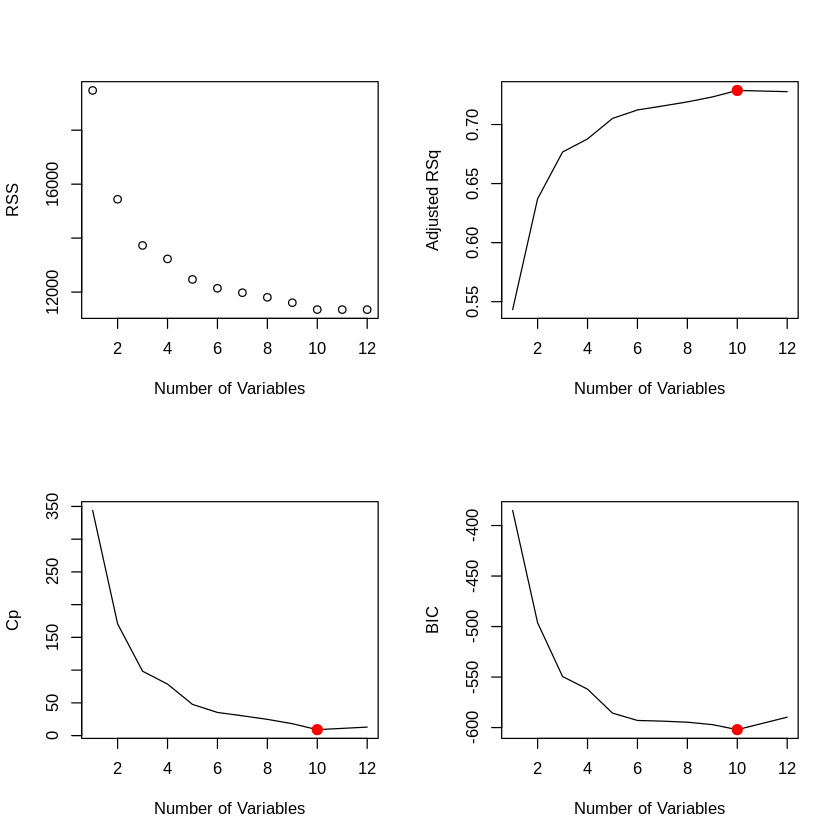

In [4]:
# Plot required elements
# YOUR CODE HERE
par(mfrow=c(2,2))
plot(reg_summary$rss, xlab="Number of Variables", ylab="RSS")


## Plot adjusted R-squared vs number of variables
# YOUR CODE HERE
plot(reg_summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
## which_max() function is used to identify the location of the maximum point of a vector
(best_model = which.max(reg_summary$adjr2))
## Plot a red dot to indicate the model with the largest adjusted R2
points(best_model, reg_summary$adjr2[best_model], col="red", cex=2, pch=20)


## In a similar fashion, plot Cp and BIC
# YOUR CODE HERE
plot(reg_summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
(best_model = which.min(reg_summary$cp))
points(best_model, reg_summary$cp[best_model], col="red", cex=2, pch=20)

plot(reg_summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
(best_model = which.min(reg_summary$bic))
points(best_model, reg_summary$bic[best_model], col="red", cex=2, pch=20)

__Pause and reflect:__

How many variables should be selected using the different metrics?

3. Use the `regsubsets` function's built-in plot command to display the selected variables for the best model with a given number of independent variables.

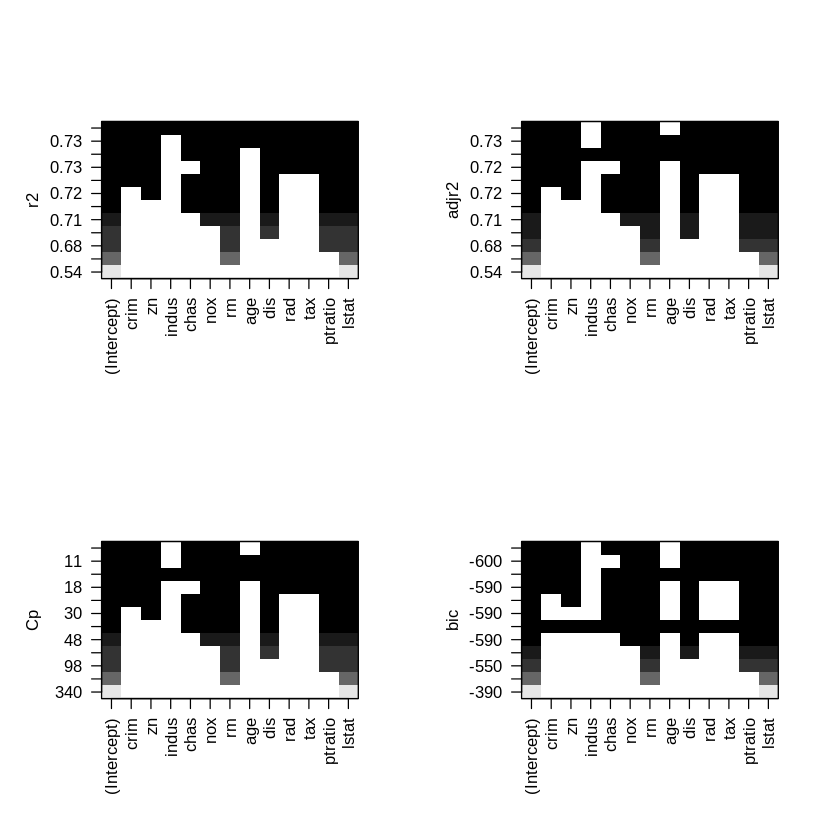

In [5]:
# Plot using regsubsets's built-in plot function
par(mfrow=c(2,2))
# YOUR CODE HERE
plot(regfit, scale="r2")
plot(regfit, scale="adjr2")
plot(regfit, scale="Cp")
plot(regfit, scale="bic")

__Pause and reflect:__

Based on the plots generated above, which variables are considered the most significant for each of the four criteria?

4. Use the `coef` function to see the coefficient estimates associated with this model.

In [6]:
# Print the coefficients
coef(regfit, id = 10)

(Intercept)         crim           zn         chas          nox           rm 
 41.45174748  -0.12166488   0.04619119   2.87187265 -18.26242664   3.67295747 
         dis          rad          tax      ptratio        lstat 
 -1.51595105   0.28393226  -0.01229150  -0.93096144  -0.54650916

In the next section, apply forward and backward stepwise selection to the Boston housing data set.

#### Section B: Stepwise selection

1. Use the `regsubsets` function to perform forward stepwise selection, print the summary, and plot the output.

**Note:** As a result of variable selection applied in the previous step, only 10 variables are retained. Update the nvmax parameter to 10 based on the output from the previous section.

Subset selection object
Call: regsubsets.formula(medv ~ ., data = house, nvmax = 10, method = "forward")
12 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          crim zn  indus chas nox rm  age dis rad tax ptratio lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     "*"  
5  ( 1 )  " "  " " " "   " "  "*" "*" " " "*" " " " " "*"     "*"  
6  ( 1 )  " "  " " 

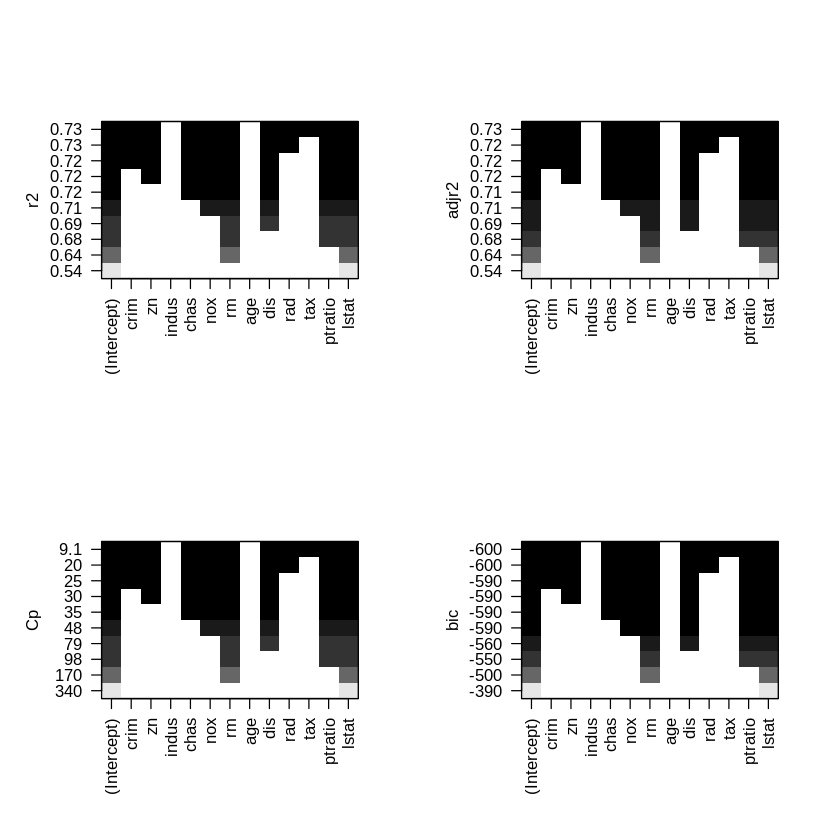

In [7]:
# Use regsubsets to perform FSS
# YOUR CODE HERE
regfit_fwd = regsubsets(medv ~ .,
                        data = house,
                        nvmax = 10,
                        method = "forward")

# Print the summary
# YOUR CODE HERE
summary(regfit_fwd)


# Plot the output
# YOUR CODE HERE
par(mfrow = c(2, 2))
plot(regfit_fwd, scale = "r2")
plot(regfit_fwd, scale = "adjr2")
plot(regfit_fwd, scale = "Cp")
plot(regfit_fwd, scale = "bic")

The steps above are duplicated to perform backward stepwise selection.

2. Use the `regsubsets` function to perform BSS, print the summary, and plot the output.

Subset selection object
Call: regsubsets.formula(medv ~ ., data = house, nvmax = 10, method = "backward")
12 Variables  (and intercept)
        Forced in Forced out
crim        FALSE      FALSE
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
lstat       FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          crim zn  indus chas nox rm  age dis rad tax ptratio lstat
1  ( 1 )  " "  " " " "   " "  " " " " " " " " " " " " " "     "*"  
2  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " " "     "*"  
3  ( 1 )  " "  " " " "   " "  " " "*" " " " " " " " " "*"     "*"  
4  ( 1 )  " "  " " " "   " "  " " "*" " " "*" " " " " "*"     "*"  
5  ( 1 )  " "  " " " "   " "  "*" "*" " " "*" " " " " "*"     "*"  
6  ( 1 )  "*"  " 

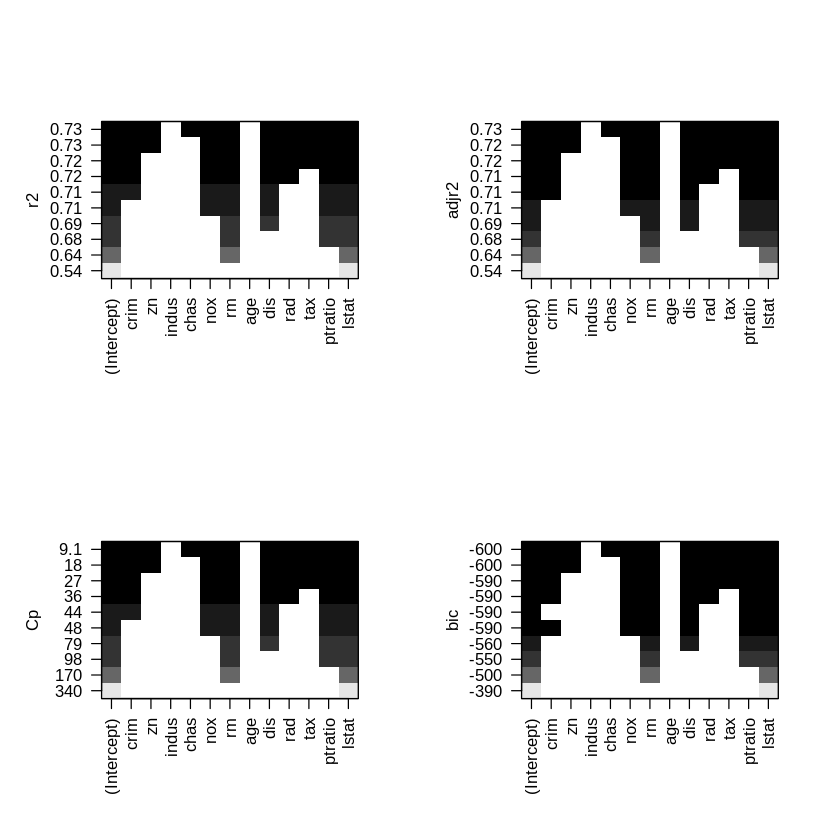

In [8]:
# Use regsubsets to perform BSS
regfit_bwd = regsubsets(medv ~ .,
                        data = house,
                        nvmax = 10,
                        method = "backward")

# Print the summary
summary(regfit_bwd)

# Plot the output
par(mfrow = c(2, 2))
plot(regfit_bwd, scale = "r2")
plot(regfit_bwd, scale = "adjr2")
plot(regfit_bwd, scale = "Cp")
plot(regfit_bwd, scale = "bic")

__Pause and reflect:__

How do the FSS and BSS outputs differ in terms of the significant variables identified? 

3. Review the coefficient estimates associated with the models using different approaches. Print the outputs of the following variable selection methods:
- Best subset selection
- Forward stepwise selection 
- Backward stepwise selection

**Note:** Set the model to 10 variables.

In [9]:
# Review coefficient outputs for the models
# YOUR CODE HERE
coef(regfit, 10)
coef(regfit_fwd, 10)
coef(regfit_bwd, 10)

(Intercept)         crim           zn         chas          nox           rm 
 41.45174748  -0.12166488   0.04619119   2.87187265 -18.26242664   3.67295747 
         dis          rad          tax      ptratio        lstat 
 -1.51595105   0.28393226  -0.01229150  -0.93096144  -0.54650916

(Intercept)         crim           zn         chas          nox           rm 
 41.45174748  -0.12166488   0.04619119   2.87187265 -18.26242664   3.67295747 
         dis          rad          tax      ptratio        lstat 
 -1.51595105   0.28393226  -0.01229150  -0.93096144  -0.54650916

(Intercept)         crim           zn         chas          nox           rm 
 41.45174748  -0.12166488   0.04619119   2.87187265 -18.26242664   3.67295747 
         dis          rad          tax      ptratio        lstat 
 -1.51595105   0.28393226  -0.01229150  -0.93096144  -0.54650916

**Note:** Remember to submit this IDE notebook after completion and navigate back to the component on the Online Campus to complete the second part of this assessment where you have the opportunity to share your thoughts and reflections regarding the output of this notebook with your peers in the class-wide discussion forum.